# Classification-Process:

For this part of the procedure, several R packages need to be installed. Simply type in your R Console:

``` R
install.packages('BiocManager') # Prerequisite for M3C
BiocManager::install('M3C')

install.packages('NMF')
install.packages('gplots')
install.packages('ggsci')
```

For installing the R Kernel for Jupyter Notebooks and Jupyterlab, please follow these instructions:
https://irkernel.github.io/installation/

You can additionally to this script follow the instructions from https://bioconductor.org/packages/release/bioc/html/M3C.html on how to use the M3C package for yourself.

In [1]:
citation("M3C")


  John, C.R., Watson, D., Lewis, M. M3C: A Monte Carlo reference-based
  consensus clustering algorithm bioRxiv (2018): 377002

A BibTeX entry for LaTeX users is

  @Article{,
    title = {M3C: A Monte Carlo reference-based consensus clustering algorithm},
    author = {Christopher R. John and David Watson and Myles Lewis and Dominic Russ and Katriona Goldmann and Michael Ehrenstein and Costantino Pitzalis and Michael Barnes},
    year = {2018},
    journal = {bioRxiv},
    doi = {https://doi.org/10.1101/377002},
  }


In [2]:
library(M3C)
library(NMF)
library(gplots)
library(ggsci)

Loading required package: pkgmaker

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 7/8

  To enable shared memory capabilities, try: install.extras('
NMF
')


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




In [3]:
result <- read.csv('results/globalDescriptors/globalDescriptors_readyForM3C.csv', header=TRUE, row.names=1)
result <- t(result) #transpose
result <- data.frame(result)
head(result)

traj_original_20191028_113207 traj_original_20191028_141719
mean_pos   -1.20386032                   -0.1133473                   
max_pos    -1.35318476                    0.5770242                   
std_pos    -0.65821776                    1.4084047                   
mean_angle  0.04500007                   -0.4319187                   
std_angle  -0.10418498                   -1.3723055                   
mean_speed  0.96661389                    0.4840645                   
           traj_original_20191028_142540 traj_original_20191028_153803
mean_pos    0.82568703                   -1.1910708                   
max_pos     0.93078439                   -0.8021447                   
std_pos    -0.49657915                    0.1229111                   
mean_angle  0.14892263                    0.4312954                   
std_angle  -0.03584238                    0.2266049                   
mean_speed -0.12103141                    0.5868119                   
           traj_original_20191029_095201 traj_original_20191029_095738
mean_pos   -0.32004560                   -0.3521724                   
max_pos     0.09257567                   -0.4459064                   
std_pos     0.58412116                   -0.3840898                   
mean_angle -0.35342058                   -1.0866809                   
std_angle   0.15586071                   -0.5504017                   
mean_speed  0.92653478                    0.7725193                   
           traj_original_20191029_095955 traj_original_20191029_100834
mean_pos   -1.06432663                   -1.2287964                   
max_pos    -0.79461161                   -1.0492906                   
std_pos    -0.91461421                   -0.8518733                   
mean_angle  0.08171806                    0.7849982                   
std_angle  -0.01526087                    1.0624138                   
mean_speed  1.98978539                    1.1009218                   
           traj_original_20191029_101228 traj_original_20191029_101633 ⋯
mean_pos    1.2440229                     1.3737975                    ⋯
max_pos     0.5350626                     1.2170116                    ⋯
std_pos    -1.3114046                    -0.9691341                    ⋯
mean_angle  1.1206537                     0.9913216                    ⋯
std_angle   0.9666864                     1.4024486                    ⋯
mean_speed -1.6150469                    -0.2968706                    ⋯
           traj_original_2020_02_10T09_39_48 traj_original_2020_02_10T10_08_32
mean_pos   1.3310322                         -0.1421397                       
max_pos    1.8123006                         -0.1712795                       
std_pos    0.1837343                         -0.2780056                       
mean_angle 0.8270663                         -1.3562566                       
std_angle  0.6242984                         -2.1858167                       
mean_speed 0.5337450                         -0.6244784                       
           traj_original_2020_02_10T10_51_29 traj_original_2020_02_10T12_24_27
mean_pos   -0.62011797                        2.3362473                       
max_pos    -0.12823807                        2.2340323                       
std_pos     0.70938437                       -0.2370405                       
mean_angle -0.04197831                        2.1789320                       
std_angle   0.72028364                        0.8435011                       
mean_speed -1.33156871                       -0.8528803                       
           traj_original_2020_02_10T12_26_39 traj_original_2020_02_10T12_37_53
mean_pos   -1.0662537                         2.8197895                       
max_pos    -0.6741589                         2.5401144                       
std_pos     0.9621108                        -0.1466101                       
mean_angle  0.3642747                         2.9470790                       
std_angle  

***M3C***

method: Monte Carlo simulation

clustering algorithm: pam

samples(columns) exceeds features(rows), switching to Cholesky decomposition reference

annotation: none

running simulations...



  |======================================================================| 100%


done.

running consensus cluster algorithm for real data...

done.



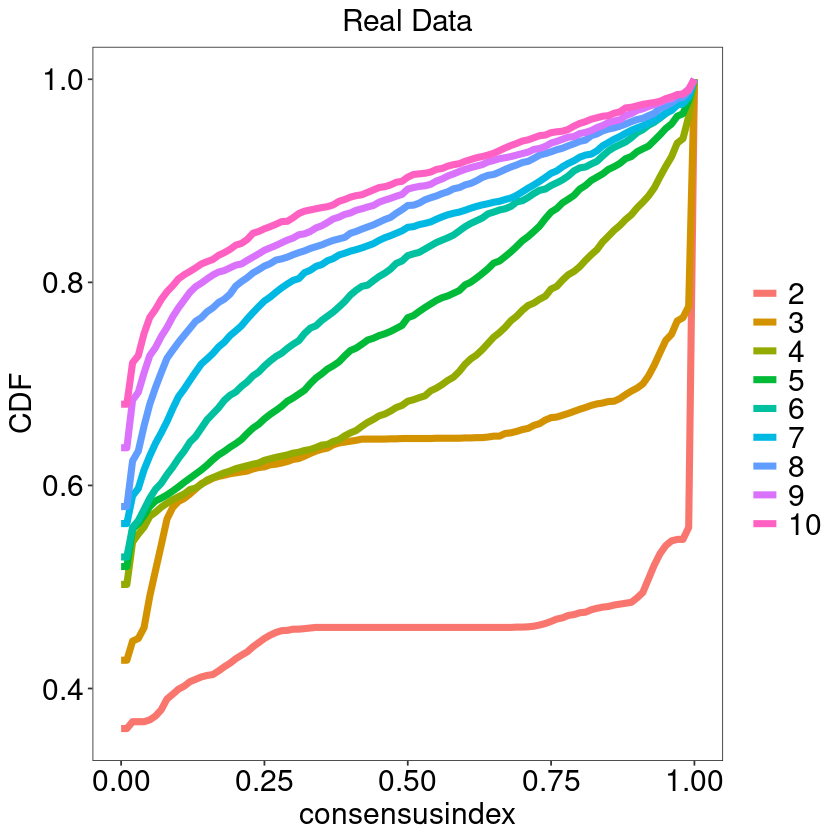

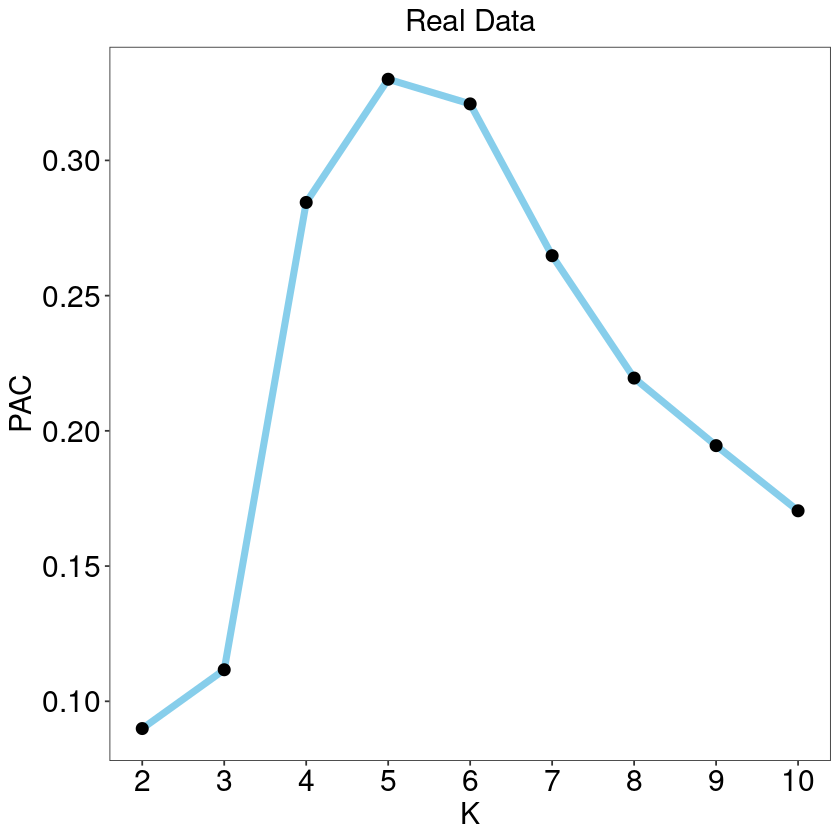

optimal K: 2



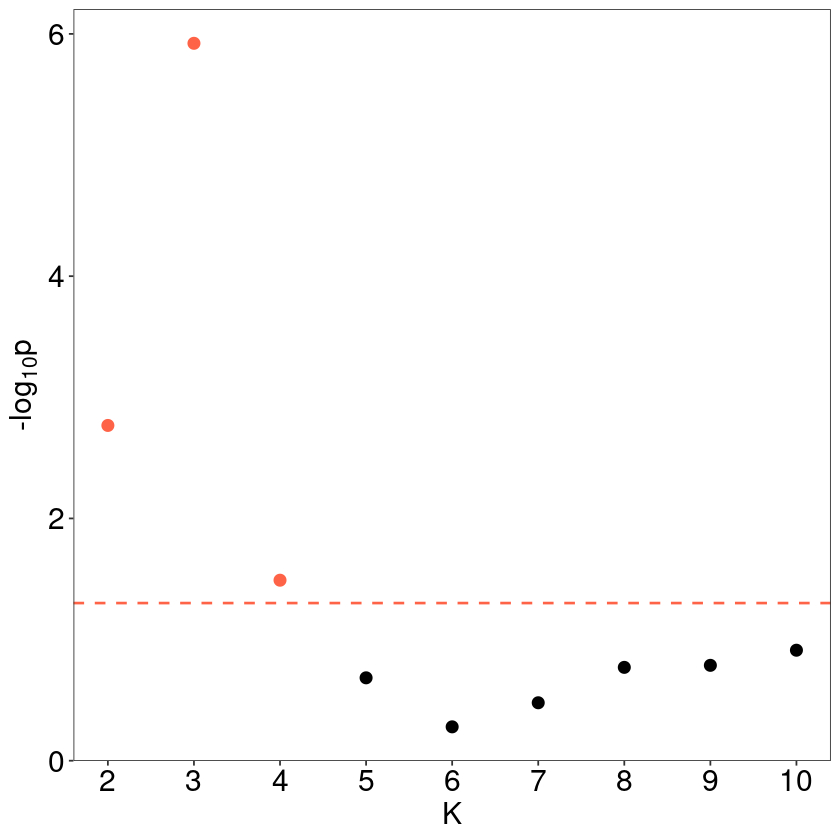

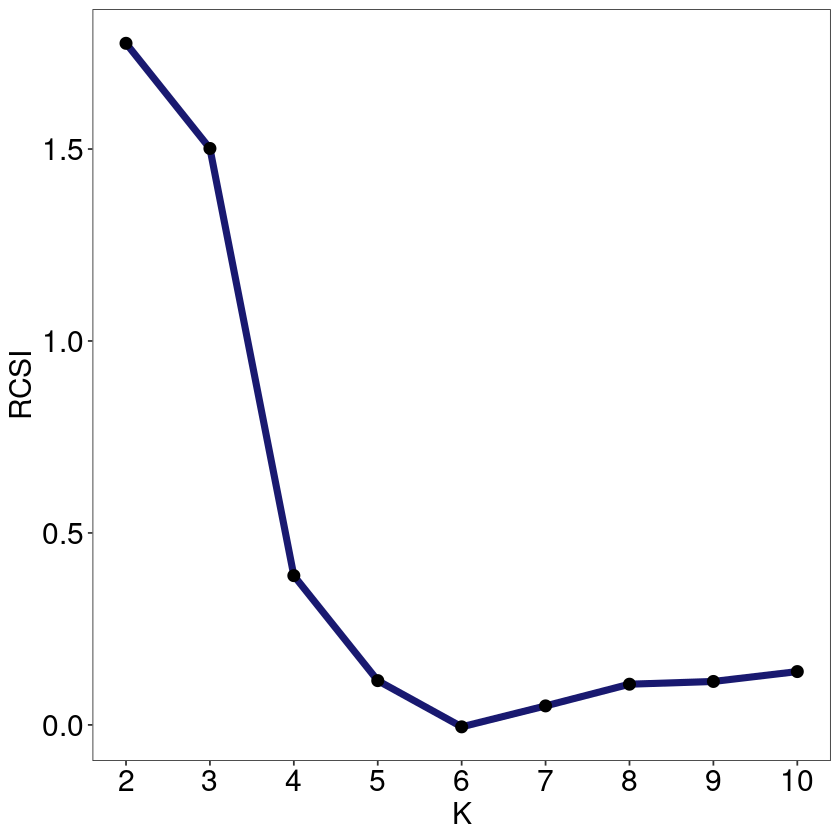

In [4]:
res <- M3C(result, cores=6, analysistype='kw',  printres = FALSE, seed=(666)) # set printres = TRUE to save figures in the current directory

***t-SNE wrapper function***

running...

done.



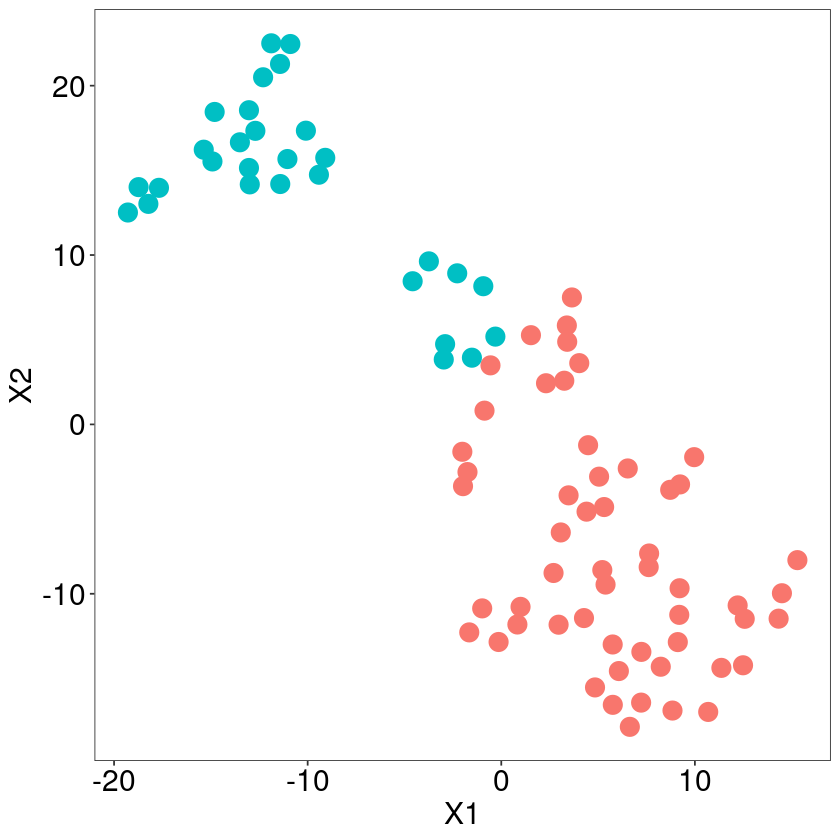

In [5]:
myK = 2
set.seed(666)

#svg(filename="figures/tSNE_descriptors_new_K2.svg")
tsne(res, K=myK, perplex=10)
#dev.off()

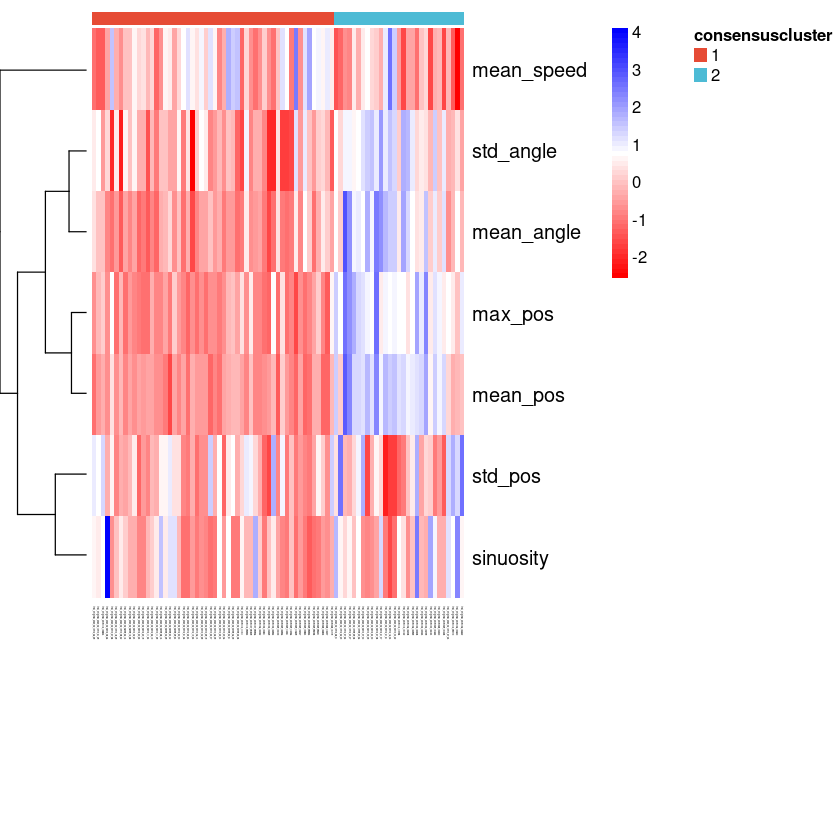

In [6]:
data <- res$realdataresults[[myK]]$ordered_data
annon <- res$realdataresults[[myK]]$ordered_annotation
ccmatrix <- res$realdataresults[[myK]]$consensus_matrix

data <- t(scale(t(data)))
data <- apply(data, 2, function(x) ifelse(x > 4, 4, x))
data <- apply(data, 2, function(x) ifelse(x < -4, -4, x))
              
                         
ann_colors <- ggsci::pal_npg("nrc")(myK)
ann_colors2 <- ggsci::pal_npg()(myK)

              
#svg(filename="figures/Heatmap_M3C_sorted_descriptors_K2.svg") 

NMF::aheatmap(data, annCol = annon, scale = 'row', Colv = NA, distfun = 'pearson',
              color = gplots::redblue(256), annColors = list(class=ann_colors, consensuscluster=ann_colors2))
#dev.off()

In [7]:
#write.csv(data,"results/M3C/descriptors/res_descriptors_data_K2.csv")
#write.csv(annon,"results/M3C/descriptors/res_descriptors_annon_K2.csv")
#write.csv(ccmatrix,"results/M3C/descriptors/res_descriptors_ccmatrix_K2.csv")